In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

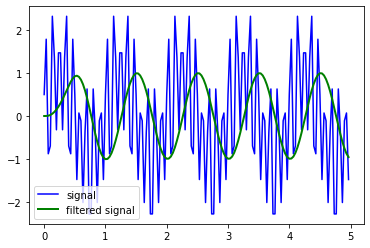

In [8]:
#low pass filter
order = 5

sampling_freq = 30

cutoff_freq = 2

sampling_duration = 5

number_of_samples = sampling_freq * sampling_duration

time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

signal = np.sin(2*np.pi*time) + 0.5*np.cos(6*2*np.pi*time) + 1.5*np.sin(9*2*np.pi*time)

normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq

numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)

filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, signal)

plt.plot(time, signal, 'b-', label='signal')
plt.plot(time, filtered_signal, 'g-', linewidth=2, label='filtered signal')
plt.legend()

Order of the Filter= 12
Cut-off frequency= 0.585 rad/s 


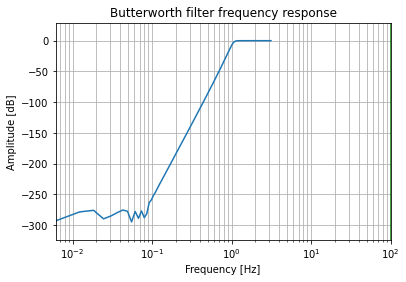

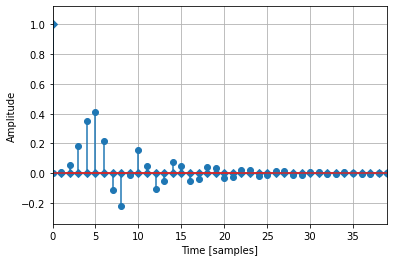

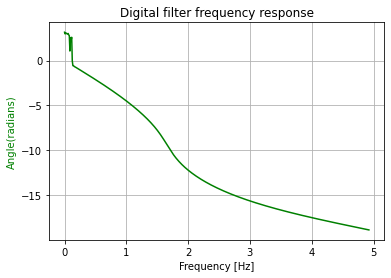

In [9]:
#high pass
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math
  
  
# Specifications of Filter 
    
 # sampling frequency 
f_sample = 3500 
    
# pass band frequency 
f_pass = 1050 
    
# stop band frequency 
f_stop = 600 
    
# pass band ripple 
fs = 0.5
    
# pass band freq in radian 
wp = f_pass/(f_sample/2)   
    
# stop band freq in radian 
ws = f_stop/(f_sample/2)  
    
# Sampling Time 
Td = 1  
    
 # pass band ripple 
g_pass = 1 
    
# stop band attenuation 
g_stop = 50 
  
# Conversion to prewrapped analog frequency 
omega_p = (2/Td)*np.tan(wp/2) 
omega_s = (2/Td)*np.tan(ws/2) 
    
    
# Design of Filter using signal.buttord function 
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True) 
    
    
# Printing the values of order & cut-off frequency! 
print("Order of the Filter=", N)  # N is the order 
# Wn is the cut-off freq of the filter 
print("Cut-off frequency= {:.3f} rad/s ".format(Wn)) 
    
    
# Conversion in Z-domain 
    
# b is the numerator of the filter & a is the denominator 
b, a = signal.butter(N, Wn, 'high', True) 
z, p = signal.bilinear(b, a, fs) 
  
# w is the freq in z-domain & h is the magnitude in z-domain 
w, h = signal.freqz(z, p, 512)
  
  
# Magnitude Response 
plt.semilogx(w, 20*np.log10(abs(h))) 
plt.xscale('log') 
plt.title('Butterworth filter frequency response') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Amplitude [dB]') 
plt.margins(0, 0.1) 
plt.grid(which='both', axis='both') 
plt.axvline(100, color='green') 
plt.show()
  
  
# Impulse Response
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)
plt.stem(np.arange(0, 40),imp,markerfmt='D',use_line_collection=True)
plt.stem(np.arange(0,40), response,use_line_collection=True)
plt.margins(0, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
  
  
# Phase Response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
angles = np.unwrap(np.angle(h))
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()

Order of the Filter= 12
Cut-off frequency= [0.39689099 0.63196761] rad/s 


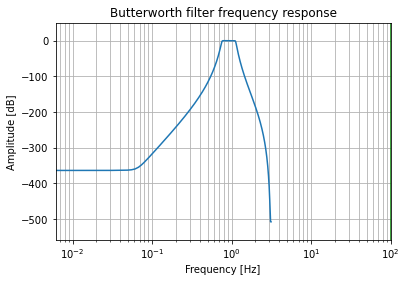

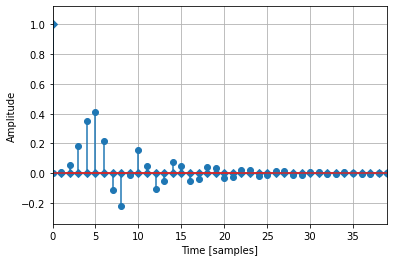

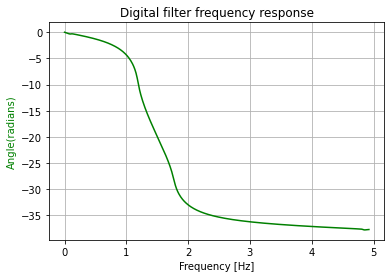

In [10]:
#band-pass
# User-defined function to convert the 
# values of edge frequencies
def convertX(f_sample,f):
  w=[]
    
  for i in range(len(f)):
    b=2*((f[i]/2)/(f_sample/2))
    w.append(b)
  
  omega_mine=[]
  
  for i in range(len(w)):
    c=(2/Td)*np.tan(w[i]/2)
    omega_mine.append(c)
  
  return omega_mine
  
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
   
# Specifications of Filter 
    
# sampling frequency 
f_sample =7000
    
# pass band frequency 
f_pass =[1400,2100] 
    
# stop band frequency 
f_stop =[1050,2450]  
    
# pass band ripple 
fs = 0.5
    
# Sampling Time 
Td = 1  
    
 # pass band ripple 
g_pass = 0.4 
    
# stop band attenuation 
g_stop = 50  
  
# Conversion to prewrapped analog
# frequency 
omega_p=convertX(f_sample,f_pass)
omega_s=convertX(f_sample,f_stop)
    
# Design of Filter using signal.buttord 
# function 
N, Wn = signal.buttord(omega_p, omega_s, 
                       g_pass, g_stop, 
                       analog=True) 
    
    
# Printing the values of order & cut-off frequency
# N is the order 
print("Order of the Filter=", N)  
# Wn is the cut-off freq of the filter 
print("Cut-off frequency= {:} rad/s ".format(Wn)) 
    
    
# Conversion in Z-domain 
    
# b is the numerator of the filter & a is 
# the denominator 
b, a = signal.butter(N, Wn, 'bandpass', True) 
z, p = signal.bilinear(b, a, fs) 
  
# w is the freq in z-domain & h is the magnitude
# in z-domain 
w, h = signal.freqz(z, p, 512)
  
# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()
  
# Impulse Response
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)
plt.stem(np.arange(0, 40),imp,markerfmt='D',use_line_collection=True)
plt.stem(np.arange(0,40), response,use_line_collection=True)
plt.margins(0, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
  
# Frequency Response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
angles = np.unwrap(np.angle(h))
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()

ValueError: invalid literal for int() with base 10: '-f'